## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
# Loading the Amazon Uk product dataset
df = pd.read_csv(r"amz_uk_price_prediction_dataset.csv")
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
df.set_index("uid", inplace=True)

In [6]:
df

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
uid,,,,,,,,
1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.70,15308,21.99,False,0,Hi-Fi Speakers
2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.70,98099,23.99,True,0,Hi-Fi Speakers
3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.70,15308,21.99,False,0,Hi-Fi Speakers
4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.70,7205,31.99,False,0,Hi-Fi Speakers
5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.60,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...
2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.00,0,22.34,False,0,Motorbike Clothing
2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.00,0,97.99,False,0,Motorbike Clothing
2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.00,0,52.99,False,0,Motorbike Clothing


In [7]:
frequency_table = pd.crosstab(index= df['category'], columns="count").sort_values(by='count', ascending=False).head(5)
frequency_table

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


C:\Users\aj824\AppData\Local\Temp\ipykernel_31616\4181320501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table['count'], palette="Set3")


<Axes: xlabel='category', ylabel='count'>

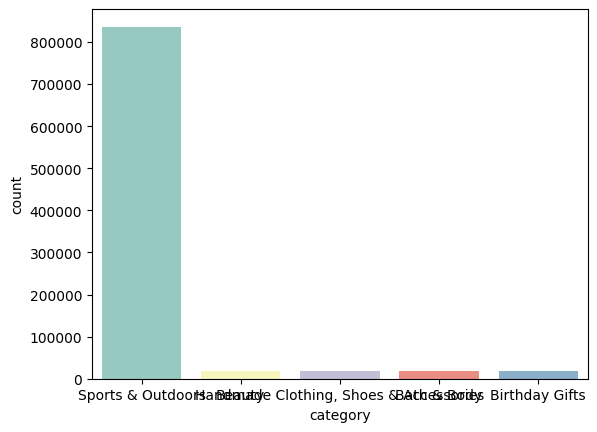

In [8]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_table.index, y=frequency_table['count'], palette="Set3")

<Axes: ylabel='count'>

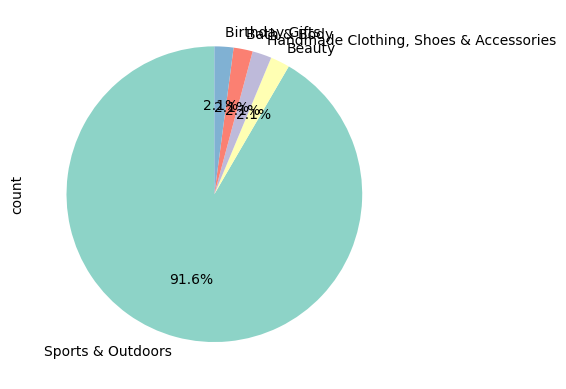

In [9]:
# Plotting a pie chart of the 'Category' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
df['category'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---

In [10]:
# Summary statistics for the dataset
df['price'].describe()

count   2443651.00
mean         89.24
std         345.61
min           0.00
25%           9.99
50%          19.09
75%          45.99
max      100000.00
Name: price, dtype: float64

**Measures of Centrality**

In [11]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

**Measures of Dispersion**

In [12]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532254907,
 345.60886175349884,
 0.0,
 100000.0,
 100000.0,
 0.25    9.99
 0.50   19.09
 0.75   45.99
 Name: price, dtype: float64)

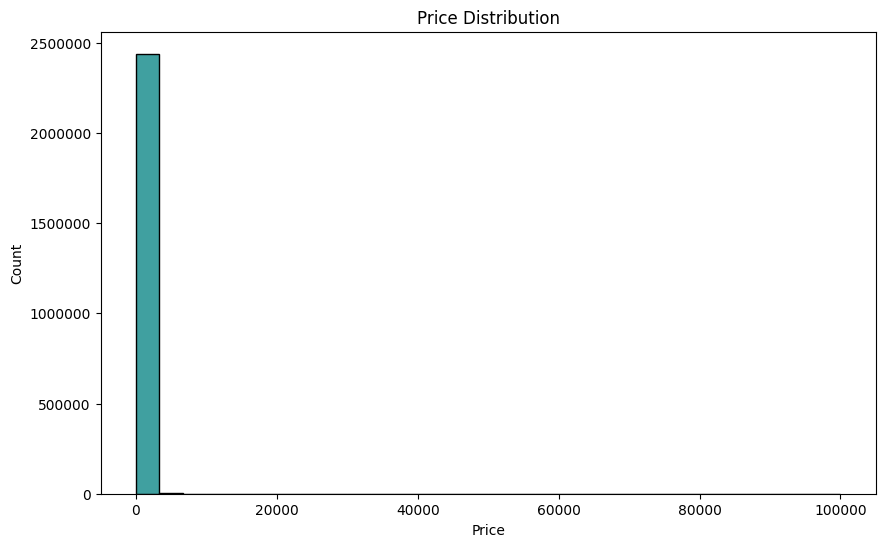

In [13]:
# Plotting a histogram for the 'price' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="teal"' sets the color of the bars to teal

# Create a Seaborn plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, color='teal', edgecolor='black')

# Disable scientific notation on the x-axis
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()

In [18]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

<Axes: ylabel='price'>

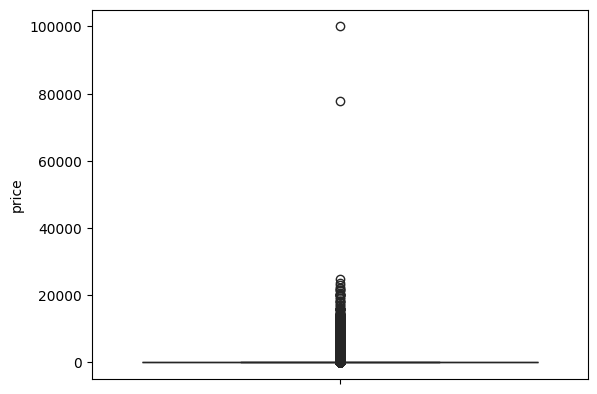

In [29]:
sns.boxplot(data = df['price'], color='teal')



### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [15]:
mean_price = df['stars'].mean()
median_price = df['stars'].median()
mode_price = df['stars'].mode()[0]

mean_price, median_price, mode_price

(2.152836472966065, 0.0, 0.0)

In [14]:
variance_price = df['stars'].var()
std_dev_price = df['stars'].std()
min_price = df['stars'].min()
max_price = df['stars'].max()
range_price = max_price - min_price
quantiles_price = df['stars'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(4.817434029796862,
 2.1948653785134207,
 0.0,
 5.0,
 5.0,
 0.25   0.00
 0.50   0.00
 0.75   4.40
 Name: stars, dtype: float64)

In [16]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

**Insights**:

1. **Skewness**: The positive value of skewness (0.08) for the 'stars' means its tail is more pronounced on the right side than on the left. Since the distribution is positive, the assumption is that its value is positive. As such, most of the values end up left of the mean. This means that the most extreme values are on the right side
  
2. **Kurtosis**: The kurtosis value of -1.92 is smaller than 2.15, which indicates that the 'stars' distribution which means that it has a flatter peak and thinner tails compared to a normal distribution

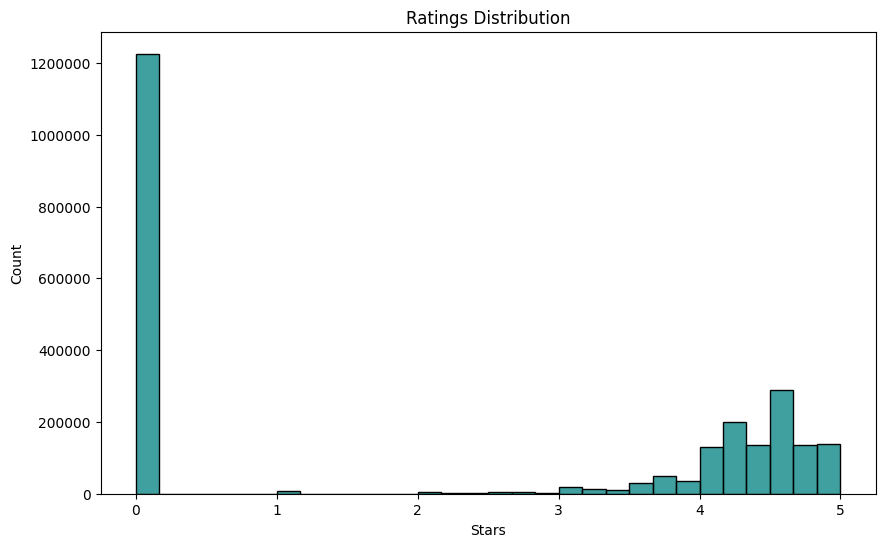

In [17]:
# Create a Seaborn plot
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=30, color='teal', edgecolor='black')

# Disable scientific notation on the x-axis
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Ratings Distribution')
plt.show()